In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv('PL_Match_Stats.csv')
dataset = dataset.dropna()

Setting 'y' dependant variable predictions to the Win Lose or Tie column and encoding it where home_win = 1 else if its a loss or draw then 0

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

y = dataset.iloc[:, 13].values

encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1,1)).toarray()


Setting my X variable to all the features that I have imported minus the xG (expected stats) that the site generates because I want to deal with
actual data facts and not with expectations that 3rd parties calculate.

In [4]:
feature_cols = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,47,48,49,50,51,52,53,54,55,56
                ,57,58,59,60,61,79,80,81,82,83,84,85,86,87,88,89,90,91,92,99,100,101,102,103,104,105,106,107,108,109,110,111,112]
X = dataset.iloc[:, feature_cols]

print((X))
print(" ---------- ")
print(y)


     players_used_home   Age_home  IDK what this is_home  MP_home  \
0            24.333333  28.533333              45.500000     38.0   
1            27.000000  25.200000              44.100000     38.0   
2            28.666667  26.166667              45.133333     38.0   
3            28.000000  25.200000              49.700000     38.0   
4            26.000000  26.100000              54.800000     38.0   
..                 ...        ...                    ...      ...   
375          28.666667  26.166667              45.133333     38.0   
376          26.000000  26.100000              54.800000     38.0   
377          26.333333  26.366667              54.466667     38.0   
378          29.000000  25.866667              54.733333     38.0   
379          26.333333  26.066667              49.533333     38.0   

     Starts_home  Min_home  90s_home   Gls_home   Ast_home    G+A_home  ...  \
0          418.0    3420.0      38.0  39.333333  26.666667   66.000000  ...   
1          41

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Optional: Set feature range
X = scaler.fit_transform(X)

print(X)
print(y)


[[0.         1.         0.23047859 ... 0.75       0.35714286 0.38095238]
 [0.57142857 0.         0.17758186 ... 0.6        0.         0.14285714]
 [0.92857143 0.29       0.21662468 ... 0.95       1.         0.80952381]
 ...
 [0.42857143 0.35       0.56926952 ... 0.25       0.07142857 0.23809524]
 [1.         0.2        0.57934509 ... 0.075      0.         0.42857143]
 [0.42857143 0.26       0.38287154 ... 0.55       0.64285714 0.47619048]]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Model isn't predicting match outcomes as expected. Testing if X variables have a linear relationship with ŷ match outcome predictions is nessecary to draw conclusions.

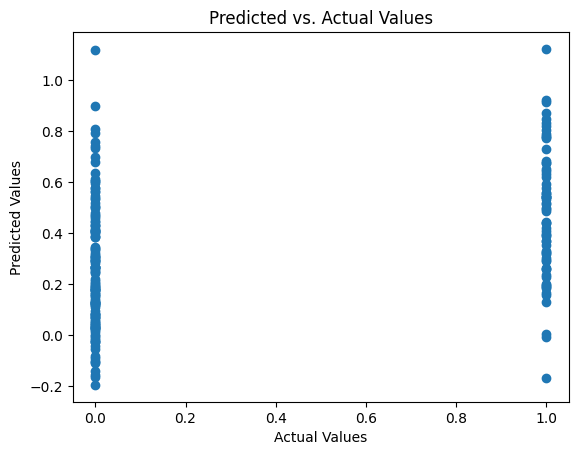

In [8]:
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()